# 3-5 水を流して問題を解く "ネットワークフロー"

## 最大流

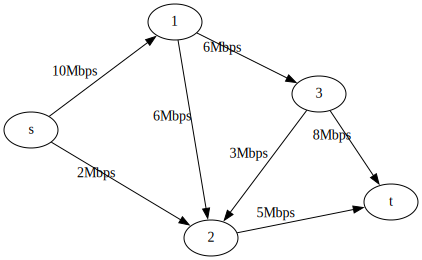

In [1]:
import graphviz

dot = graphviz.Digraph(engine='neato')
dot.node('s', pos='-1,1.5!')
dot.node('1', pos='1,3!')
dot.node('2', pos='1.5,0!')
dot.node('3', pos='3,2!')
dot.node('t', pos='4,.5!')
dot.attr(rankdir='LR')
dot.edge('s', '1', '10Mbps')
dot.edge('s', '2', '2Mbps')
dot.edge('1', '2', '6Mbps')
dot.edge('1', '3', '6Mbps')
dot.edge('2', 't', '5Mbps')
dot.edge('3', '2', '3Mbps')
dot.edge('3', 't', '8Mbps')

dot

各辺に対してデータを通信する量を$f(e)$，最大の通信可能量を$c(e)$とする．このとき以下が成り立つ．

- 通信量の制約：$0\leqq f(e) \leqq c(e)$
- 入ってくる量と出ていく量は等しい：$v\in V-\{s,t\}$に対して，$\sum_{e\in\delta_{-}(v)}f(e)=\sum_{e\in\delta_{+}(v)}f(e)$

以上の条件の下，sから出るデータ量$\sum_{e\in\delta_{-}(s)}f(e)(=\sum_{e\in\delta_{+}(t)}f(e))$を最大化する．

### 用語
- 最大流: 最大のデータ通信量を達成する$f$のこと
- 辺の容量: $c$
- 辺の流量: $f$
- 始点(source): $s$
- 終点(sink): $t$

### 貪欲的アルゴリズム

1. $f(e)<c(e)$である$e$のみを用いた$s$から$t$までのパスを見つける
2. そのようなパスがなければ終了．パスが存在したら，そのパスに沿って目一杯流し，1. へ戻る

In [13]:
# 貪欲的に放流

import ipywidgets
import graphviz

with open('assets/3-5/01_greedy.txt') as f:
    __film = f.read().split('\n\n')

@ipywidgets.interact(__frame=ipywidgets.IntSlider(min=0, max=len(__film) - 1))
def project(__frame):
    exec(__film[__frame])

interactive(children=(IntSlider(value=0, description='__frame', max=10), Output()), _dom_classes=('widget-inte…

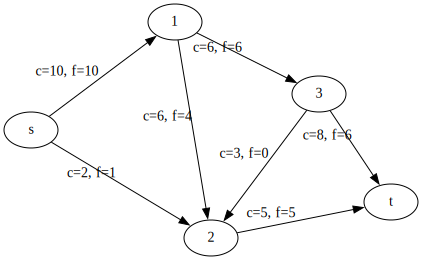

In [3]:
# 適切に放流

import graphviz

with open('assets/3-5/02_correct_flow.txt') as f:
    __film = f.read()

exec(__film)

In [14]:
# 流量の差分

import ipywidgets
import graphviz

with open('assets/3-5/03_compare.txt') as f:
    __film = f.read().split('\n\n')

@ipywidgets.interact(__frame=ipywidgets.IntSlider(min=0, max=1))
def project(__frame):
    exec(__film[__frame])


interactive(children=(IntSlider(value=0, description='__frame', max=1), Output()), _dom_classes=('widget-inter…

### 改良貪欲法アルゴリズム（Ford-Fulkerson）

1. $f(e)<c(e)$である$e$と，$f(e)>0$である$e$の逆辺$rev(e)$のみを用いた$s$から$t$へのパスを見つける
2. そのようなパスがなければ終了．パスが存在したら，そのパスに沿って目一杯流し，1. へ戻る

In [15]:
# 改良貪欲法(Ford-Fulkerson法)で放流

import ipywidgets
import graphviz

with open('assets/3-5/04_ford-fulkerson.txt') as f:
    __film = f.read().split('\n\n')

@ipywidgets.interact(__frame=ipywidgets.IntSlider(min=0, max=len(__film) - 1))
def project(__frame):
    exec(__film[__frame])

interactive(children=(IntSlider(value=0, description='__frame', max=7), Output()), _dom_classes=('widget-inter…

:NOTE  
上の残余グラフは間違い．
例えばs->1への辺は存在しなくなる．（流せなくなるので）

- $f(e)<c(e)$である$e$と，$f(e)>0$である$e$の逆辺$rev(e)$のみからなるグラフを**残余グラフ**という
- 残余グラフ上でのs-tパスを**増加パス**という

In [6]:
# Ford-Fulkerson法

...

Ellipsis

$O(|F||E|)$

## 最小カット

### 用語

- カット：ある頂点集合$S\subseteq V$に対して，頂点集合$S$の頂点から，$S$に含まれない頂点へ出ていく辺の集合のこと．カット$(S,V-S)$のように表現される
- カットの容量：カットの各辺の容量の和

以下s, tが与えられたとして，
- $s$-$t$カット：$s\in S,t\in V-S$となるようにカットすること・またそのようなカットのこと

sを含み，tを含まない頂点集合を全通り考えた時，カット容量が最も小さくなるカットをs, tの最小カットという．


**POINT**：s-tカットを除去すると，$s$から$t$へのパスは存在しなくなる

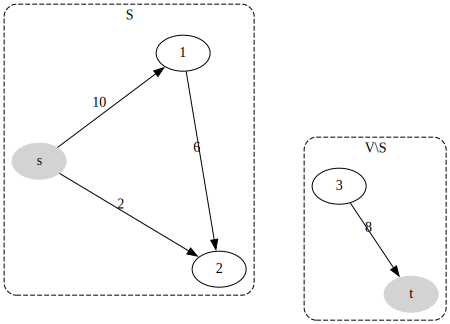

In [7]:
# s-tカット

import graphviz

dot = graphviz.Digraph(engine='fdp')

dot.node('s', pos='-1,1.5!', color='lightgray', style='filled')
dot.node('1', pos='1,3!')
dot.node('2', pos='1.5,0!')
dot.node('3', pos='3,2!')
dot.node('t', pos='4,.5!', color='lightgray', style='filled')

with dot.subgraph(name='cluster0') as sub_dot:
    sub_dot.attr(style='rounded,dashed', label='S')
    sub_dot.edge('s', '2', '2')
    sub_dot.edge('s', '1', '10')
    sub_dot.edge('1', '2', '6')

with dot.subgraph(name='cluster1') as sub_dot:
    sub_dot.attr(style='rounded,dashed', label='V\\\S')
    sub_dot.edge('3', 't', '8')

# dot.edge('1', '3', '6', color='red')
# dot.edge('3', '2', '3')
# dot.edge('2', 't', '5', color='red')

dot

### 最小カット問題
**ネットワークに対して，$s$から$t$へのパスが存在しなくなるために除去しなければならない辺の容量の和の最小値**を求める問題

最小カット 6 + 5 = 11


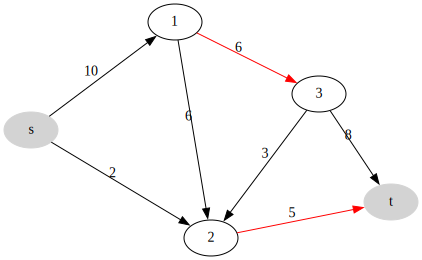

In [16]:
# 最小カット

import graphviz

dot = graphviz.Digraph(engine='fdp')

dot.node('s', pos='-1,1.5!', color='lightgray', style='filled')
dot.node('1', pos='1,3!')
dot.node('2', pos='1.5,0!')
dot.node('3', pos='3,2!')
dot.node('t', pos='4,.5!', color='lightgray', style='filled')

dot.edge('s', '1', '10')
dot.edge('s', '2', '2')
dot.edge('1', '2', '6')
dot.edge('3', 't', '8')

dot.edge('1', '3', '6', color='red')
dot.edge('3', '2', '3')
dot.edge('2', 't', '5', color='red')

print('最小カット 6 + 5 = 11')
dot

#### 最小カット

2頂点$s,t\in V$が指定された容量付き有向グラフ$G=(V,E,c)$において，$$c^{*}=\min\{c(S,V-S)|s\in S,t\in V-S\}$$を達成する$(S^{*},V-S^{*})$を$s,t$の最小カットという．

#### 弱双対性定理

2頂点$s,t\in V$が指定された容量付き有向グラフ$G=(V,E,c)$において，$s$から$t$への最大フローの総流量$F^{*}$は以下の式を満たす：
$$F^{*}\le c^{*}$$

**証明**  
$F^{*}= \sum_{e\in(S^{*},V-S^{*})}f^{*}(e)-\sum_{e\in(V-S^{*},S^{*})}f^{*}(e)\le \sum_{e\in(S^{*},V-S^{*})}f^{*}(e)=c^{*}$

#### 弱双対性定理の系

2頂点$s,t\in V$が指定された容量付き有向グラフ$G=(V,E,c)$において，総流量が$F$の$s$から$t$へのフロー$F'$と，$s\in S,t\in V-S$を満たす頂点集合$S$が$$F=c(S,V-S)$$を満たすとき，$F'$は$s$から$t$への最大フローであり，$(S,V-S)$は$s,t$の最小カットである．

**証明**  
弱双対性定理と最小カットの定義から，$F\le F^{*}\le c^{*}\le c(S,V-S)$．$F=c(S,V-S)$となるとき，左式の全ての不等号において等号が成立する．

#### フロー増加路定理

2頂点$s,t\in V$が指定された容量付き有向グラフ$G=(V,E,c)$において，$s$から$t$へのフロー$F$を考えるとき，以下の命題は等価である:
$$
\begin{aligned}
    (A)& フローF'に対する残余グラフがフロー増加路を含まない\\
    (B)& フローF'はsからtへの最大フローである
\end{aligned}
$$

**証明**  
(B)->(A)：  
対偶「フロー$F'$に対する残余グラフがフロー増加路を含むならフロー$F'$は$s$から$t$への最大フローでない」を示す．これは残余グラフとフロー増加路の定義より明らか．  
(A)->(B)：  
$F'$に対する残余グラフにおいて，$s$から到達可能な頂点の集合を$X$とする．$u\in X,v\in V-X$とすると，辺$(v,u)$が残余グラフによって作成された辺である場合，辺$(u,v)$において，$f(u,v)=e(u,v)$を満たす$_{(1^{*})}$．辺$(v,u)$が$G$に含まれる場合，$f(v,u)=0$となる$_{(2^{*})}$．以上の議論より，$F=c(X,V-X)$が得られ$_{(3^{*})}$，弱双対性定理の系より$F'$が最大フローであることが示された．

尚，(A)->(B)の証明においては同時に最小カットであることも示される．

**証明の補足**  
- $_{(1^{*})}$ $f(u,v)=e(u,v)$: $0<f(u,v)<e(u,v)$となる場合，辺$(u,v)$が存在することになるが，これはフロー増加路を含むことになる．
- $_{(2^{*})}$ $f(v,u)=0$: $f(v,u)>0$となる場合，残余グラフにおいて辺$(u,v)$が出来るため．同じくフロー増加路を含むことになる．
- $_{(3^{*})}$ $F=c(X,V-X)$: $F=f(X,V-X)-f(V-X,X)=f(X,V-X)-0=f(X,V-X)=c(X,V-X)$
  - $f(v,u)=0$より，$f(V-X,X)=0$
  - カットの定義より$f(X,V-X)=c(X,V-X)$

#### 強双対性定理（フロー増加路定理の系）

2頂点$s,t\in V$が指定された容量付き有向グラフ$G=(V,E,c)$において，$s$から$t$への最大フローの総流量$F^{*}$は以下の式を満たす：$$F^{*}=c^{*}$$

**証明**  
最大フロー$F^{*}$に対して，フロー増加路定理より，$F^{*}$に対する残余グラフはフロー増加路を含まない．よって$F^{*}=c(X,V-X)$であり，弱双対性定理の系から$(X,V-X)$は$s,t$の最小カット．以上により$F^{*}=c(X,V-X)=c^{*}$が示された．

***

任意のs-tフロー$f$と任意のs-tカット$(S,V-S)$を考える．

- ($f$の流量) $=$ ($s$から出る辺の流量)
- $v\in S-{s}$について，($v$から出る辺の流量) $=$ ($v$に入る辺の流量)

であるから，($f$の流量) $=$ ($S$から出る辺の流量) $-$ ($S$に入る辺の流量)となる．

以上より，($f$の流量) $\le$ ($S$から出る辺の流量) $=$ (カット容量)

[具体例] 自分の家から世界中に水が供給されることを考えると，

- fの流量 <- 世界への供給量
- Sから出る辺の流量 <- 家から出る水の量
- Sに入る辺の流量 <- 家に入ってくる水の量

:補足  
- ($f$の流量) $\le$ ($S$から出る辺の流量)は，($S$に入る辺の流量)が正であることから
- ($S$から出る辺の流量) $=$ (カット容量)はカットの定義そのもの

In [9]:
# ford-fulkersonアルゴリズムの正当性

import ipywidgets
import graphviz

with open('assets/3-5/05_proof_of_ford-fulkerson.txt') as f:
    __film = f.read().split('\n\n')

@ipywidgets.interact(__frame=ipywidgets.IntSlider(min=0, max=len(__film) - 1))
def project(__frame):
    exec(__film[__frame])

interactive(children=(IntSlider(value=0, description='__frame', max=1), Output()), _dom_classes=('widget-inter…

上図（１）はFord-Fulkersonのアルゴリズムによって得られたフロー$f'$である．$f'$における残余グラフ（上図（２））において，$s-v$パスの存在するような頂点$v$からなる集合を$S(=\{s,1,2\})$とすると，$f'$の残余グラフにおいて$s-t$パスが存在しないことにより，$(S,V-S)$は$s-t$カットになる．また，$S$の定義により，カットに含まれる辺$e$について$f'(e)=c(e)(=11)$となっており，$V-S$から$S$に向かう辺について$f'(e)=0$となっている．従って，($f'$の流量) $=$ ($S$から出る辺の流量) $-$ ($S$に入る辺の流量) $=$ (カットの容量)となり，$f'$が最大流であることが分かる．

***

## 二部マッチング

### 用語
- マッチング：端点を共有しない辺集合$M$のこと
- 最大マッチング：要素数最大の$M$のこと
  - 最大マッチングのサイズが$2|M|=|V|$を満たすとき，グラフは完全マッチングを持つという
- 二部マッチング：二部グラフにおけるマッチングのこと

最大マッチングの例: M={(u1, v1), (u2, v3), (u3, v2)}


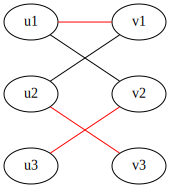

In [10]:
# 最大マッチング

import graphviz

dot = graphviz.Graph(engine='neato')

dot.node('u1', pos='0,3!')
dot.node('u2', pos='0,2!')
dot.node('u3', pos='0,1!')
dot.node('v1', pos='1.5,3!')
dot.node('v2', pos='1.5,2!')
dot.node('v3', pos='1.5,1!')
dot.edge('u1', 'v1', color='red')
dot.edge('u1', 'v2')
dot.edge('u2', 'v1')
dot.edge('u2', 'v3', color='red')
dot.edge('u3', 'v2', color='red')

print('最大マッチングの例: M={(u1, v1), (u2, v3), (u3, v2)}')
dot

グラフの辺$e$を$U$から$V$にへの方向に向き付け，容量を$1$とする．始点と終点を表す2つの頂点$s,t$を加え，$s$から全ての頂点$u\in U$に向かって容量$1$の辺を，すべての頂点$v\in V$に向かって容量$1$の辺を張る．

こうして作られたグラフ$G$における最大$s-t$フローの流量がもとの二部グラフ$G$における最大マッチングのサイズと等しくなり，$U-V$間の流量が正な辺集合が最大マッチングとなる．

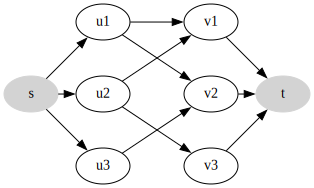

In [11]:
# 最大流問題への変換

import graphviz

dot = graphviz.Digraph(engine='neato')

dot.node('s', pos='-1,2!', color='lightgray', style='filled')
dot.node('u1', pos='0,3!')
dot.node('u2', pos='0,2!')
dot.node('u3', pos='0,1!')
dot.node('v1', pos='1.5,3!')
dot.node('v2', pos='1.5,2!')
dot.node('v3', pos='1.5,1!')
dot.node('t', pos='2.5,2!', color='lightgray', style='filled')
dot.edge('s', 'u1')
dot.edge('s', 'u2')
dot.edge('s', 'u3')
dot.edge('u1', 'v1')
dot.edge('u1', 'v2')
dot.edge('u2', 'v1')
dot.edge('u2', 'v3')
dot.edge('u3', 'v2')
dot.edge('v1', 't')
dot.edge('v2', 't')
dot.edge('v3', 't')

dot

In [12]:
# 仕事の割り当て

...

Ellipsis

## 一般マッチング

- Edmondsのアルゴリズム
- Tutte（タット）行列を用いた方法

無向グラフ$G=(V,E)$を勝手に向き付けて得られる有向グラフを$G'=(V,E')$とする．辺$e\in E'$に対して変数$x_{e}$を用意し，次のように定めた$V\times V$行列$T=(t_{u,v})$をtutte行列という．
$$t_{u,v}=\begin{cases}
    x_{(u,v)}((u,v)\in E') \\
    -x_{(v,u)}((v,u\in E')) \\
    0 (otherwise)
\end{cases}$$

このとき，$G$が完全マッチングを持たない <=> 行列式$det(T)$が恒等的に$0$．

## マッチング・辺カバー・安定集合・点カバー

- マッチング：辺集合$M\subseteq E$で，互いに端点を共有しない
- 辺カバー：辺集合$F\subseteq E$で，$G$のどの頂点も少なくとも1つの$F$に含まれる辺に接続している
- 安定集合：点集合$S\subseteq V$で，$S$のどの2点も$G$において隣接していない
- 点カバー：点集合$S\subseteq V$で，$G$のどの辺も少なくとも1つの$S$に含まれる頂点に接続している

1. 孤立点のないグラフに対し，|最大マッチング| + |最小辺カバー| = |$V$|
2. |最大安定集合| + |最小点カバー| = |$V$|
3. (二部グラフにおいて) |最大マッチング| = |最小点カバー|

## 最小費用流

**POINT**  
- 流量の最大値ではなく，ある流量$F$を流した時のコストの最小値
- 残余グラフにおける最短路に基づいて流す
- 残余グラフにおける逆辺は，コストが負とみなせることから，ベルマンフォード法を用いる

**ポテンシャル**を導入することで，負辺を解消する事が可能．

ポテンシャル：各頂点$v$に対する重み$h(v)$のこと

ポテンシャルの初期値：０
ポテンシャルの更新：新しいポテンシャル=古いポテンシャル-計算した最短路長

http://dopal.cs.uec.ac.jp/okamotoy/lect/2013/opt/handout13.pdf